In [ ]:
## Data Source url = https://github.com/owid/covid-19-data/tree/master/public/data

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
#from bs4 import BeautifulSoup as soup
#from datetime import date, datetime

In [96]:
covid =pd.read_csv("../input/covid19-dataset/owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [97]:
covid.shape

(99981, 60)

In [7]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [8]:
#look at different locations
covid["location"].value_counts()

Mexico                             550
Argentina                          550
Thailand                           547
Peru                               545
Taiwan                             535
                                  ... 
British Virgin Islands              36
Cook Islands                        36
Pitcairn                             7
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: location, Length: 230, dtype: int64

In [10]:
#Describe categorical columns only, include = 'O'
covid.describe(include='O')

,iso_code,continent,location,date,tests_units
count,99981,95294,99981,99981,53890
unique,230,6,230,551,4
top,ARG,Africa,Mexico,2021-05-26,tests performed
freq,550,25737,550,225,33596


In [12]:
#check if any null values TRUE OR FALSE
covid.isna().any()

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [13]:
covid.isna().sum()

iso_code                                     0
continent                                 4687
location                                     0
date                                         0
total_cases                               3598
new_cases                                 3601
new_cases_smoothed                        4611
total_deaths                             13744
new_deaths                               13588
new_deaths_smoothed                       4611
total_cases_per_million                   4111
new_cases_per_million                     4114
new_cases_smoothed_per_million            5119
total_deaths_per_million                 14244
new_deaths_per_million                   14088
new_deaths_smoothed_per_million           5119
reproduction_rate                        19438
icu_patients                             89873
icu_patients_per_million                 89873
hosp_patients                            87422
hosp_patients_per_million                87422
weekly_icu_ad

In [98]:
#Getting cases in India
india_case=covid[covid["location"]=="India"]
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41359,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41360,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41361,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41362,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41363,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [99]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41875,IND,Asia,India,2021-06-29,30362848.0,45951.0,47734.143,398454.0,817.0,1113.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41876,IND,Asia,India,2021-06-30,30411634.0,48786.0,46979.429,399459.0,1005.0,1068.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41877,IND,Asia,India,2021-07-01,30458251.0,46617.0,46258.000,400312.0,853.0,1000.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41878,IND,Asia,India,2021-07-02,30502362.0,44111.0,45602.714,401050.0,738.0,936.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41879,IND,Asia,India,2021-07-03,30545433.0,43071.0,44607.143,402005.0,955.0,893.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

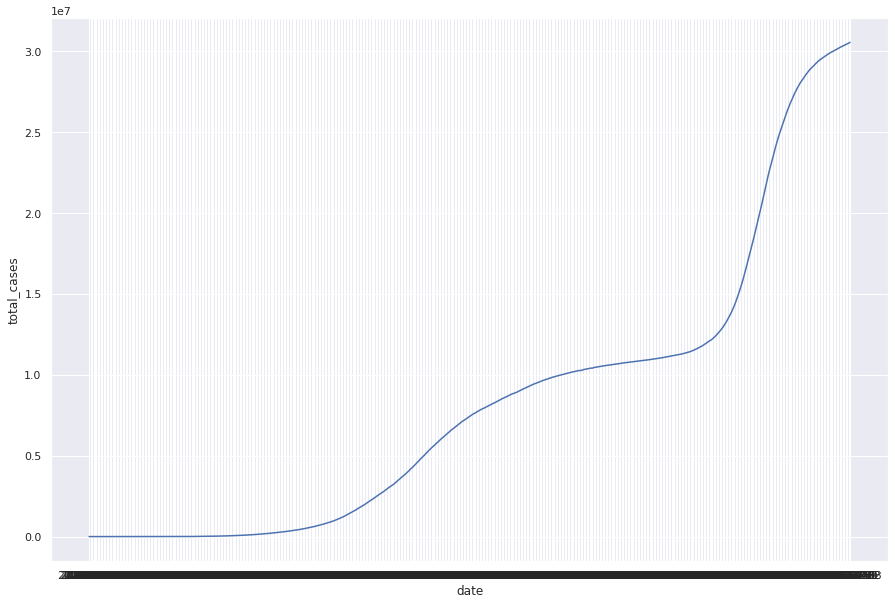

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

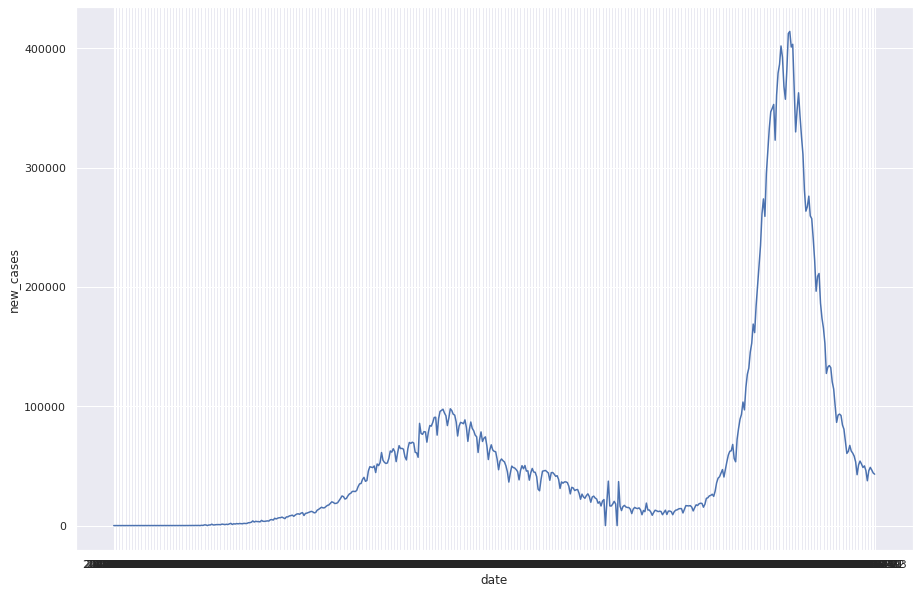

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_cases",data=india_case)
plt.show()

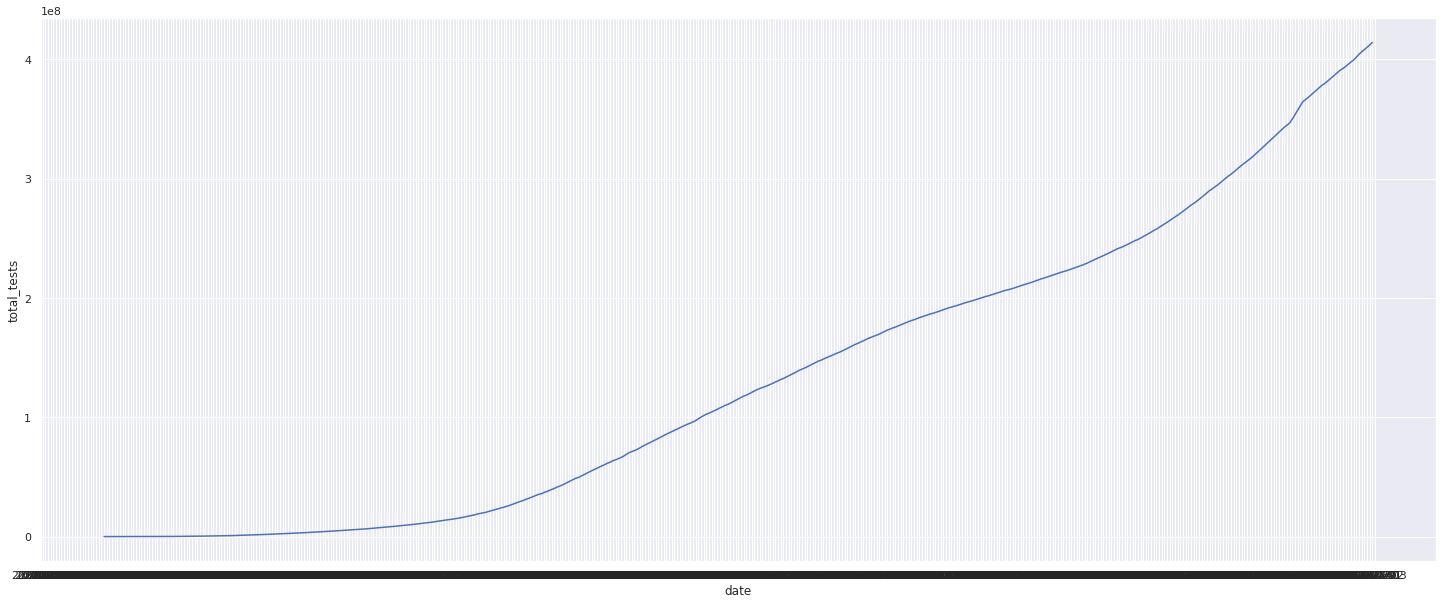

In [29]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x="date",y="total_tests",data=india_case)
plt.show()

In [28]:
import plotly.express as px

fig = px.line(india_case,x="date",y="new_tests",hover_data=["new_tests"])
fig.show()

In [31]:
#Getting cases in United States
USCases=covid[covid["location"]=="United States"]
USCases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
94750,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
94751,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
94752,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
94753,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
94754,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75


In [32]:
USCases.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
95274,USA,North America,United States,2021-06-29,33652098.0,11596.0,12411.857,604474.0,331.0,273.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
95275,USA,North America,United States,2021-06-30,33664970.0,12872.0,12474.143,604714.0,240.0,254.429,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
95276,USA,North America,United States,2021-07-01,33679433.0,14463.0,12707.429,605019.0,305.0,249.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
95277,USA,North America,United States,2021-07-02,33709131.0,29698.0,13562.143,605413.0,394.0,234.429,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
95278,USA,North America,United States,2021-07-03,33713870.0,4739.0,13195.857,605493.0,80.0,224.857,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


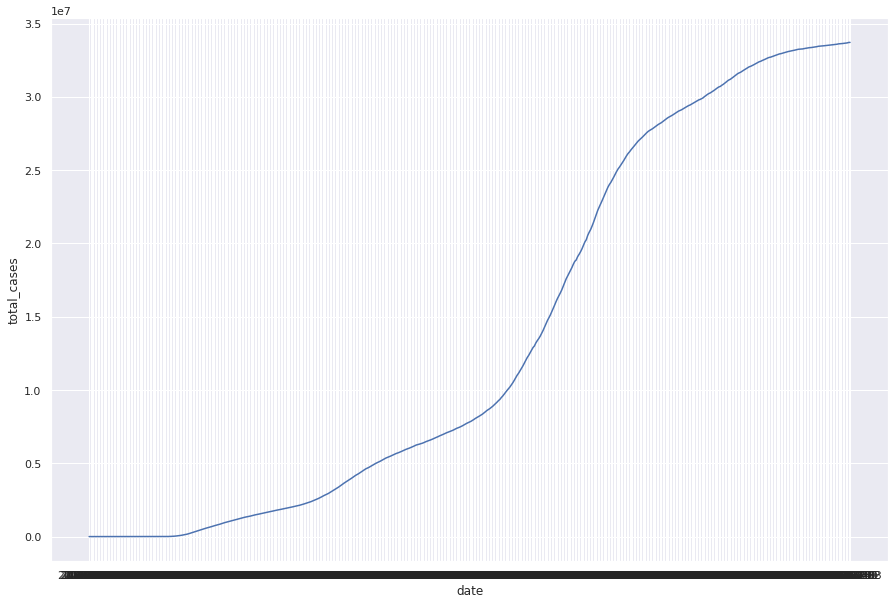

In [33]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=USCases)
plt.show()

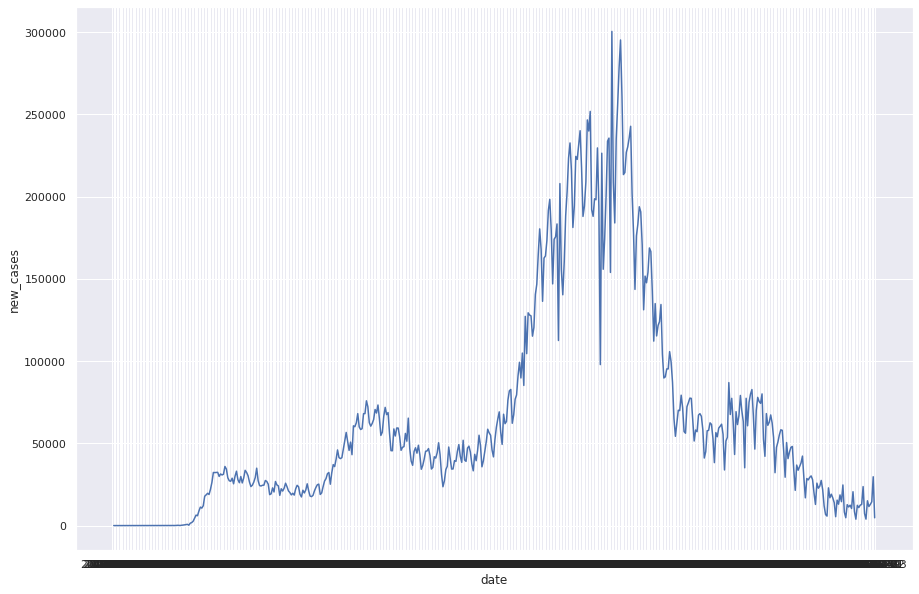

In [34]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="new_cases",data=USCases)
plt.show()

In [36]:
#Getting cases in India, United States and China
IndUsCh=covid[(covid["location"]=="United States")| (covid["location"]=="India")|(covid["location"]=="China") ] 
IndUsCh.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
18791,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18792,CHN,Asia,China,2020-01-23,641.0,93.0,NaN,18.0,1.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18793,CHN,Asia,China,2020-01-24,918.0,277.0,NaN,26.0,8.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18794,CHN,Asia,China,2020-01-25,1401.0,483.0,NaN,42.0,16.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18795,CHN,Asia,China,2020-01-26,2067.0,666.0,NaN,56.0,14.0,NaN,...,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN


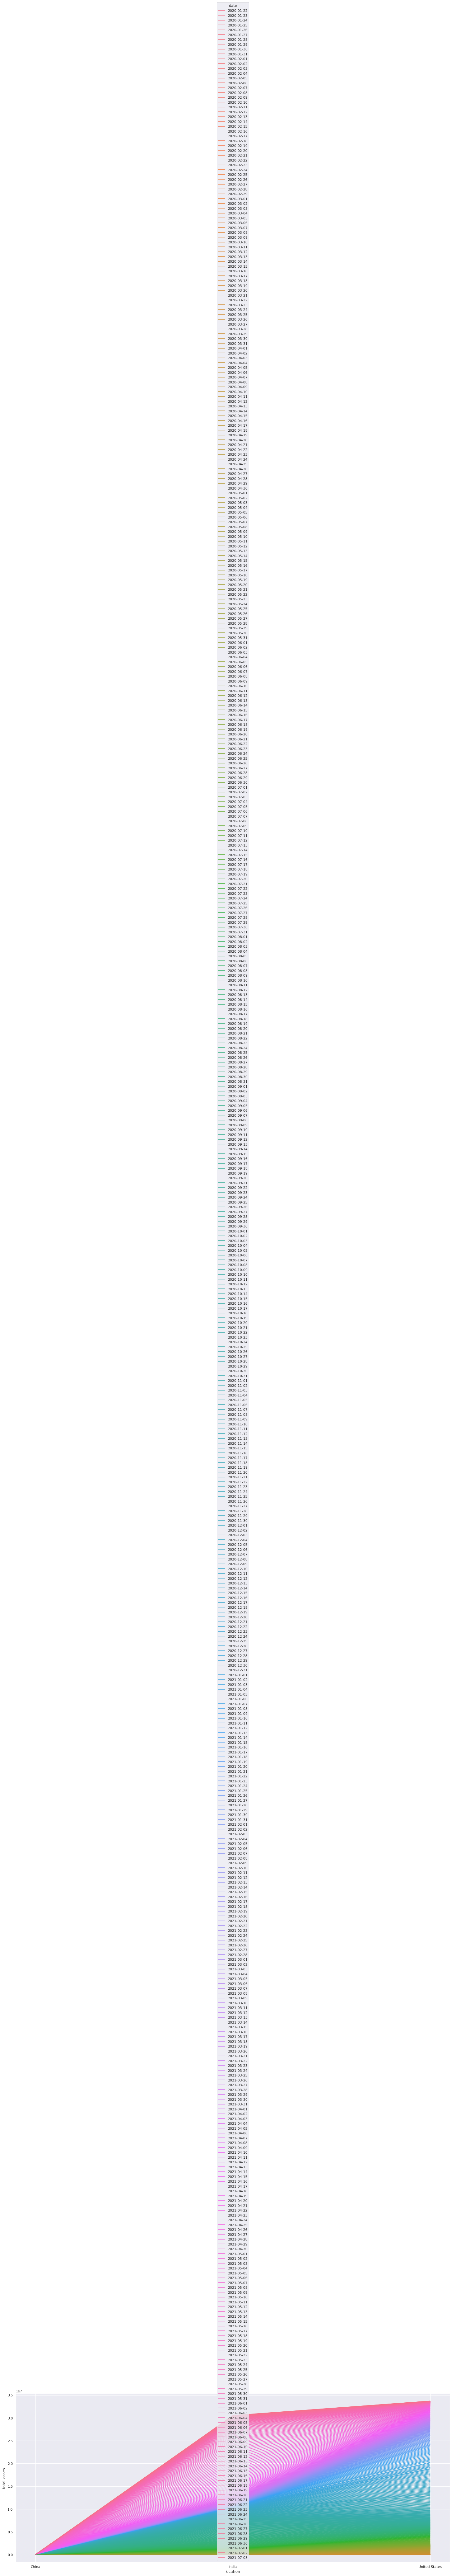

In [41]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x="location",y="total_cases",data=IndUsCh,hue="date")
plt.show()

In [122]:
india_case.isna().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         47
icu_patients                             521
icu_patients_per_million                 521
hosp_patients                            521
hosp_patients_per_million                521
weekly_icu_admissions                    521
weekly_icu

In [100]:
#Getting latest Data
last_day_cases=covid[covid["date"]=="2021-07-03"]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
495,AFG,Asia,Afghanistan,2021-07-03,120216.0,0.0,1232.000,4962.0,0.0,63.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1002,OWID_AFR,NaN,Africa,2021-07-03,5633811.0,43060.0,35586.857,144913.0,484.0,607.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,ALB,Europe,Albania,2021-07-03,132534.0,8.0,3.571,2456.0,0.0,0.000,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
1992,DZA,Africa,Algeria,2021-07-03,141007.0,457.0,413.429,3745.0,10.0,8.571,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2481,AND,Europe,Andorra,2021-07-03,13918.0,0.0,5.143,127.0,0.0,0.000,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97958,VNM,Asia,Vietnam,2021-07-03,19310.0,1189.0,569.286,84.0,0.0,1.429,...,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,NaN
98586,OWID_WRL,NaN,World,2021-07-03,183459394.0,375056.0,382206.000,3970719.0,6842.0,7653.286,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
99036,YEM,Asia,Yemen,2021-07-03,6926.0,2.0,2.857,1361.0,0.0,0.429,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
99509,ZMB,Africa,Zambia,2021-07-03,162487.0,1874.0,2350.857,2397.0,56.0,61.429,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


In [49]:
#sorting by max cases
max_cases_country = last_day_cases.sort_values(by="new_cases",ascending =False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
98586,OWID_WRL,NaN,World,2021-07-03,183459394.0,375056.0,382206.000,3970719.0,6842.0,7653.286,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
5237,OWID_ASI,NaN,Asia,2021-07-03,56267382.0,141778.0,143194.286,797487.0,2266.0,2318.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83640,OWID_SAM,NaN,South America,2021-07-03,33241598.0,104946.0,110293.571,1014825.0,2831.0,3179.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30598,OWID_EUR,NaN,Europe,2021-07-03,48478433.0,62740.0,64432.714,1108265.0,885.0,1001.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13209,BRA,South America,Brazil,2021-07-03,18742025.0,54556.0,50733.000,523587.0,1635.0,1550.286,...,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.765,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,CRI,North America,Costa Rica,2021-07-03,371206.0,0.0,1457.286,4686.0,0.0,12.000,...,1.3,137.973,8.78,6.400,17.400,83.841,1.130,80.28,0.810,NaN
495,AFG,Asia,Afghanistan,2021-07-03,120216.0,0.0,1232.000,4962.0,0.0,63.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
22782,CUW,North America,Curacao,2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.62,NaN,NaN,NaN,NaN,78.88,NaN,NaN
44533,IMN,Europe,Isle of Man,2021-07-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.40,NaN,NaN


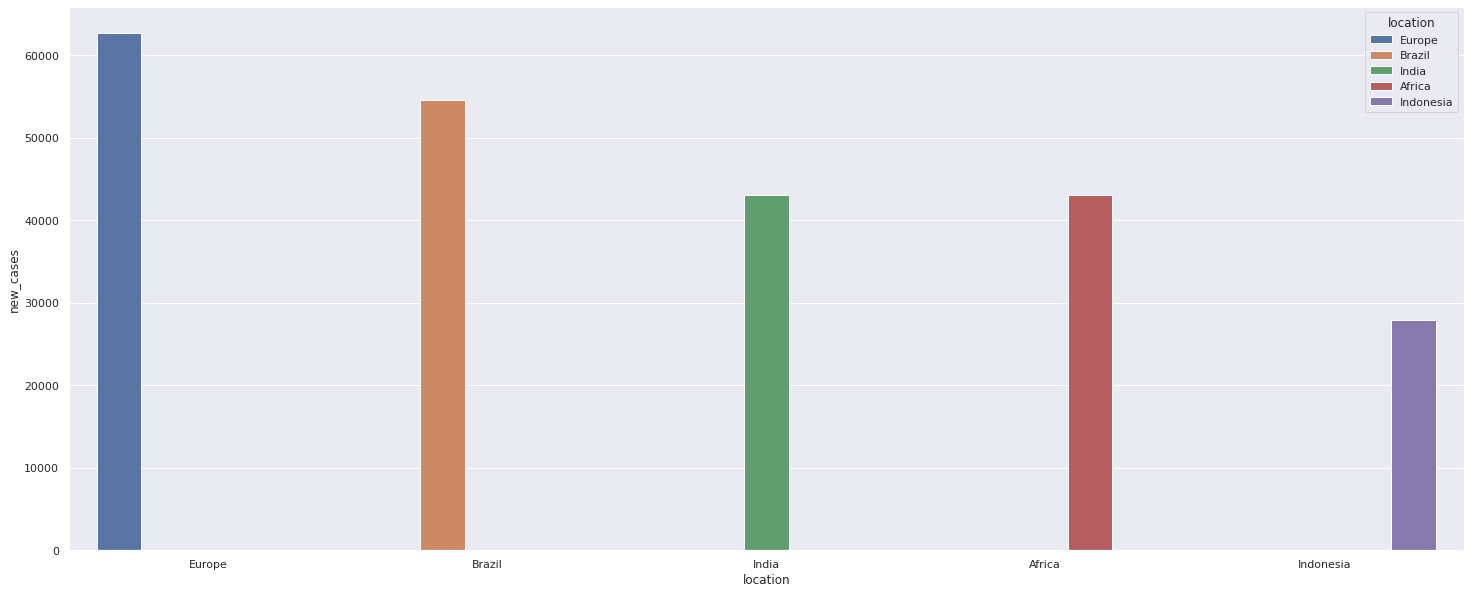

In [58]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="location",y="new_cases",data=max_cases_country[3:8],hue="location")
plt.show()

#  ML Algo

In [101]:
#Linear Regression
from sklearn.model_selection import train_test_split

In [102]:
#convert sring date to actual Date datatype
import datetime as dt
india_case['date']=pd.to_datetime(india_case['date'])
india_case.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41359,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41360,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41361,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41362,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41363,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [104]:
#convert date-time to ordinal
india_case['date']=india_case['date'].map(dt.datetime.toordinal)
india_case.head()

TypeError: descriptor 'toordinal' requires a 'datetime.date' object but received a 'int'

In [114]:
#define dependent and independ variables
x = india_case['date']
y = india_case['new_cases']

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [116]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [117]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


LinearRegression()

In [118]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41875,IND,Asia,India,737970,30362848.0,45951.0,47734.143,398454.0,817.0,1113.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41876,IND,Asia,India,737971,30411634.0,48786.0,46979.429,399459.0,1005.0,1068.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41877,IND,Asia,India,737972,30458251.0,46617.0,46258.000,400312.0,853.0,1000.286,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41878,IND,Asia,India,737973,30502362.0,44111.0,45602.714,401050.0,738.0,936.714,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41879,IND,Asia,India,737974,30545433.0,43071.0,44607.143,402005.0,955.0,893.429,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [119]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [120]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_test,y_pred)

459715928762.1446

In [121]:
lr.predict(np.array([[737975]]))

array([[146199.22623032]])